<a href="https://colab.research.google.com/github/learnvisionAI/ObjectDetection_YOLO/blob/main/Session3_YOLOV8_Obj_Segmentation/Segmentation_Custom_Potholes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing the Required Libraries**

In [1]:
#Importing  os to create a helper variable, which allows us to easily manages different paths in the code
import os


In [2]:
#glob is used to return all file paths that match a specific pattern.
import glob

In [3]:
# If we want to display a single image, then "Image" Library is fine, but if we want to display multiple images by just running a single cell
# then we need to import display

from IPython.display import Image, display

# **In the First Step, We need to check whether we have access to the GPU or not**

In [5]:
!nvidia-smi

Fri Jan  5 08:55:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [6]:
HOME = os.getcwd()

In [7]:
print(HOME)

/content


#**Installing Ultralytics using Pip Install**

#**YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.**

In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -qe ultralytics

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [8]:
!pip install ultralytics==8.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.8/219.8 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.2 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=057e38c0fcece1ce1c808b85cd47cb6654286330a4cff70dc44d3a1a02c4a716
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


##Checking whether YOLOv8 is Installed and its working Fine

In [9]:
import ultralytics

In [10]:
ultralytics.checks()

Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


#**Importing the Crack Segmentation Dataset from Roboflow**

In [11]:
!mkdir {HOME}/datasets


In [12]:
!pwd

/content


In [13]:
%cd {HOME}/datasets


/content/datasets


In [14]:
!pwd

/content/datasets


In [15]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="16XuuBsC5XqwYkDJ8HdL")
project = rf.workspace("vidhya-shankar-ely0e").project("pothole_segmentation")
dataset = project.version(1).download("yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninsta

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pothole_Segmentation-1 in yolov5pytorch:: 100%|██████████| 408/408 [00:00<00:00, 5702.88it/s]


#**Train the YOLOv8 Model on the Custom Dataset**

In [16]:
%cd {HOME}

/content


In [17]:
%cd {dataset.location}

/content/datasets/Pothole_Segmentation-1


If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

In [18]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8l-seg.pt data=/content/datasets/Pothole_Segmentation-1/data.yaml epochs=60 imgsz=640

/content
100% 88.1M/88.1M [00:00<00:00, 248MB/s]

yolo/engine/trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=/content/datasets/Pothole_Segmentation-1/data.yaml, epochs=60, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=0.0

In [20]:
!ls {HOME}/runs/segment/train

args.yaml					    MaskP_curve.png   train_batch2.jpg
BoxF1_curve.png					    MaskPR_curve.png  train_batch600.jpg
BoxP_curve.png					    MaskR_curve.png   train_batch601.jpg
BoxPR_curve.png					    predictions.json  train_batch602.jpg
BoxR_curve.png					    results.csv       val_batch0_labels.jpg
confusion_matrix.png				    results.png       val_batch0_pred.jpg
events.out.tfevents.1704445210.39c5393ce2e2.2689.0  train_batch0.jpg  weights
MaskF1_curve.png				    train_batch1.jpg


#**Displaying the Confusion Matrix**

/content


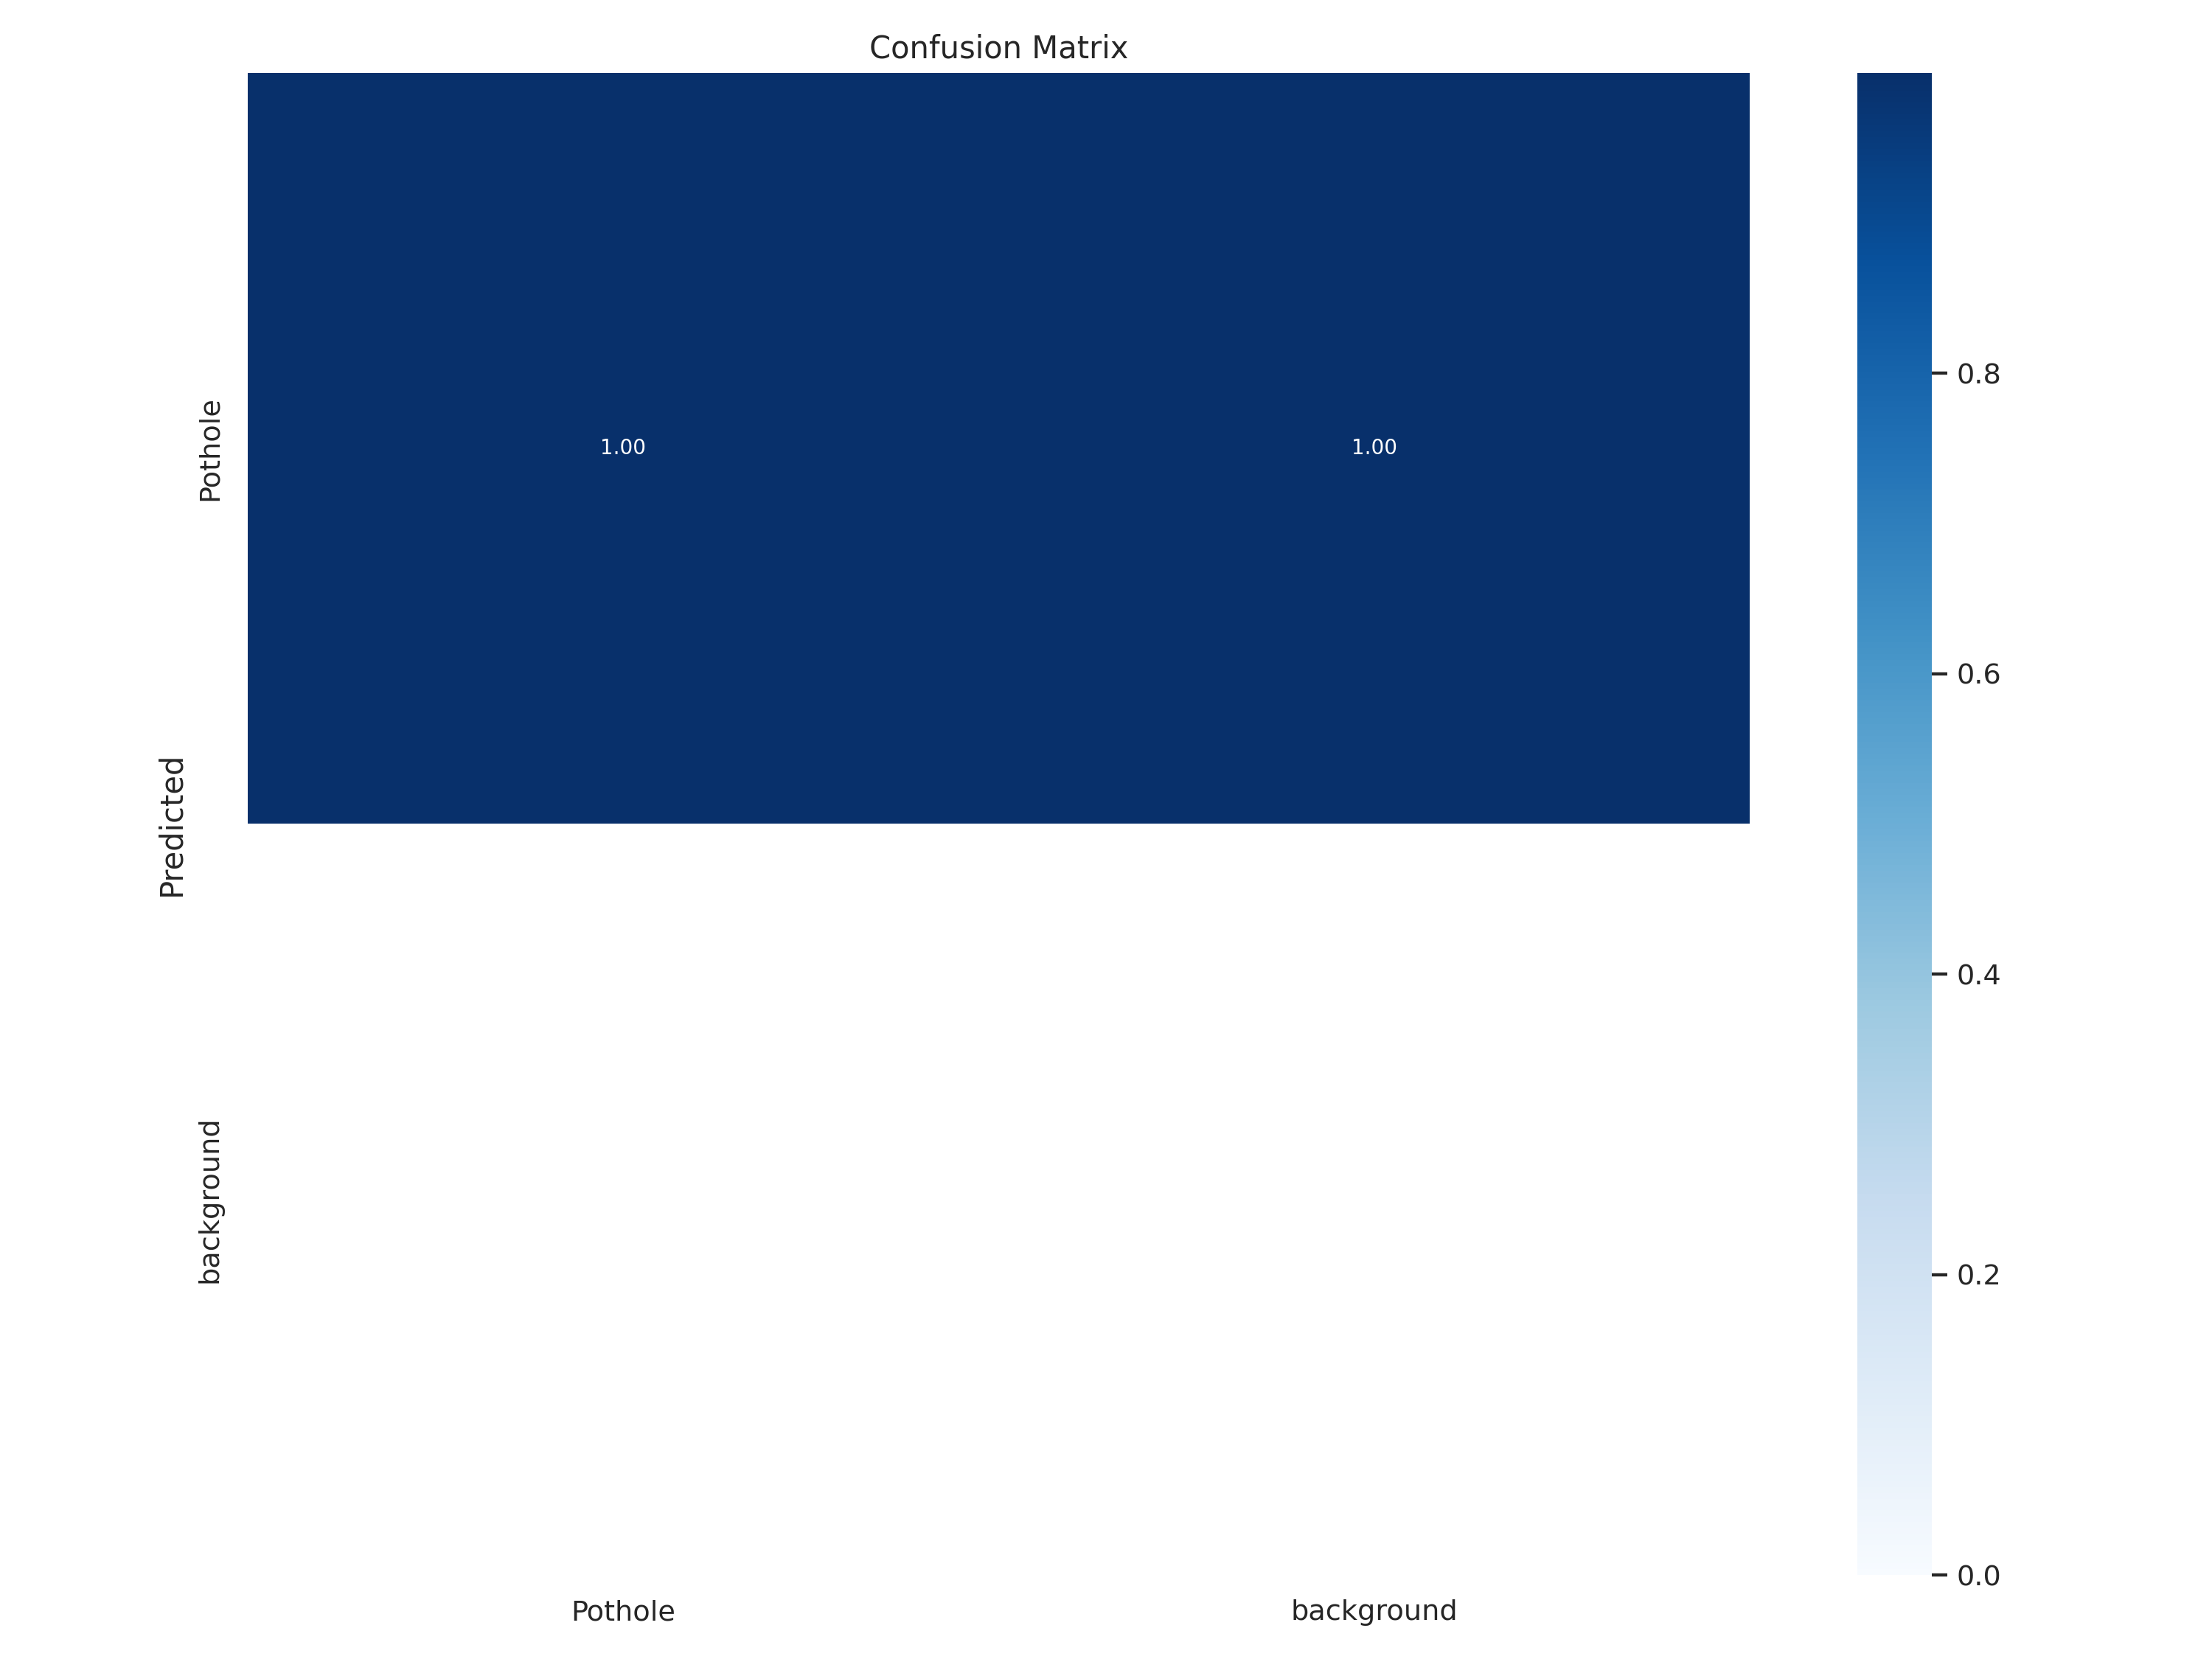

In [21]:
#Confusion matrix is the chart that shows how our model handles different classes
#86% of the time the model detected and segmentation is done correctly that there is a crack,  while 14% of the time
#when there is a crack the model is unable to detect and do the segmentation on it
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=900)

#**Training and Validation Loss**

/content


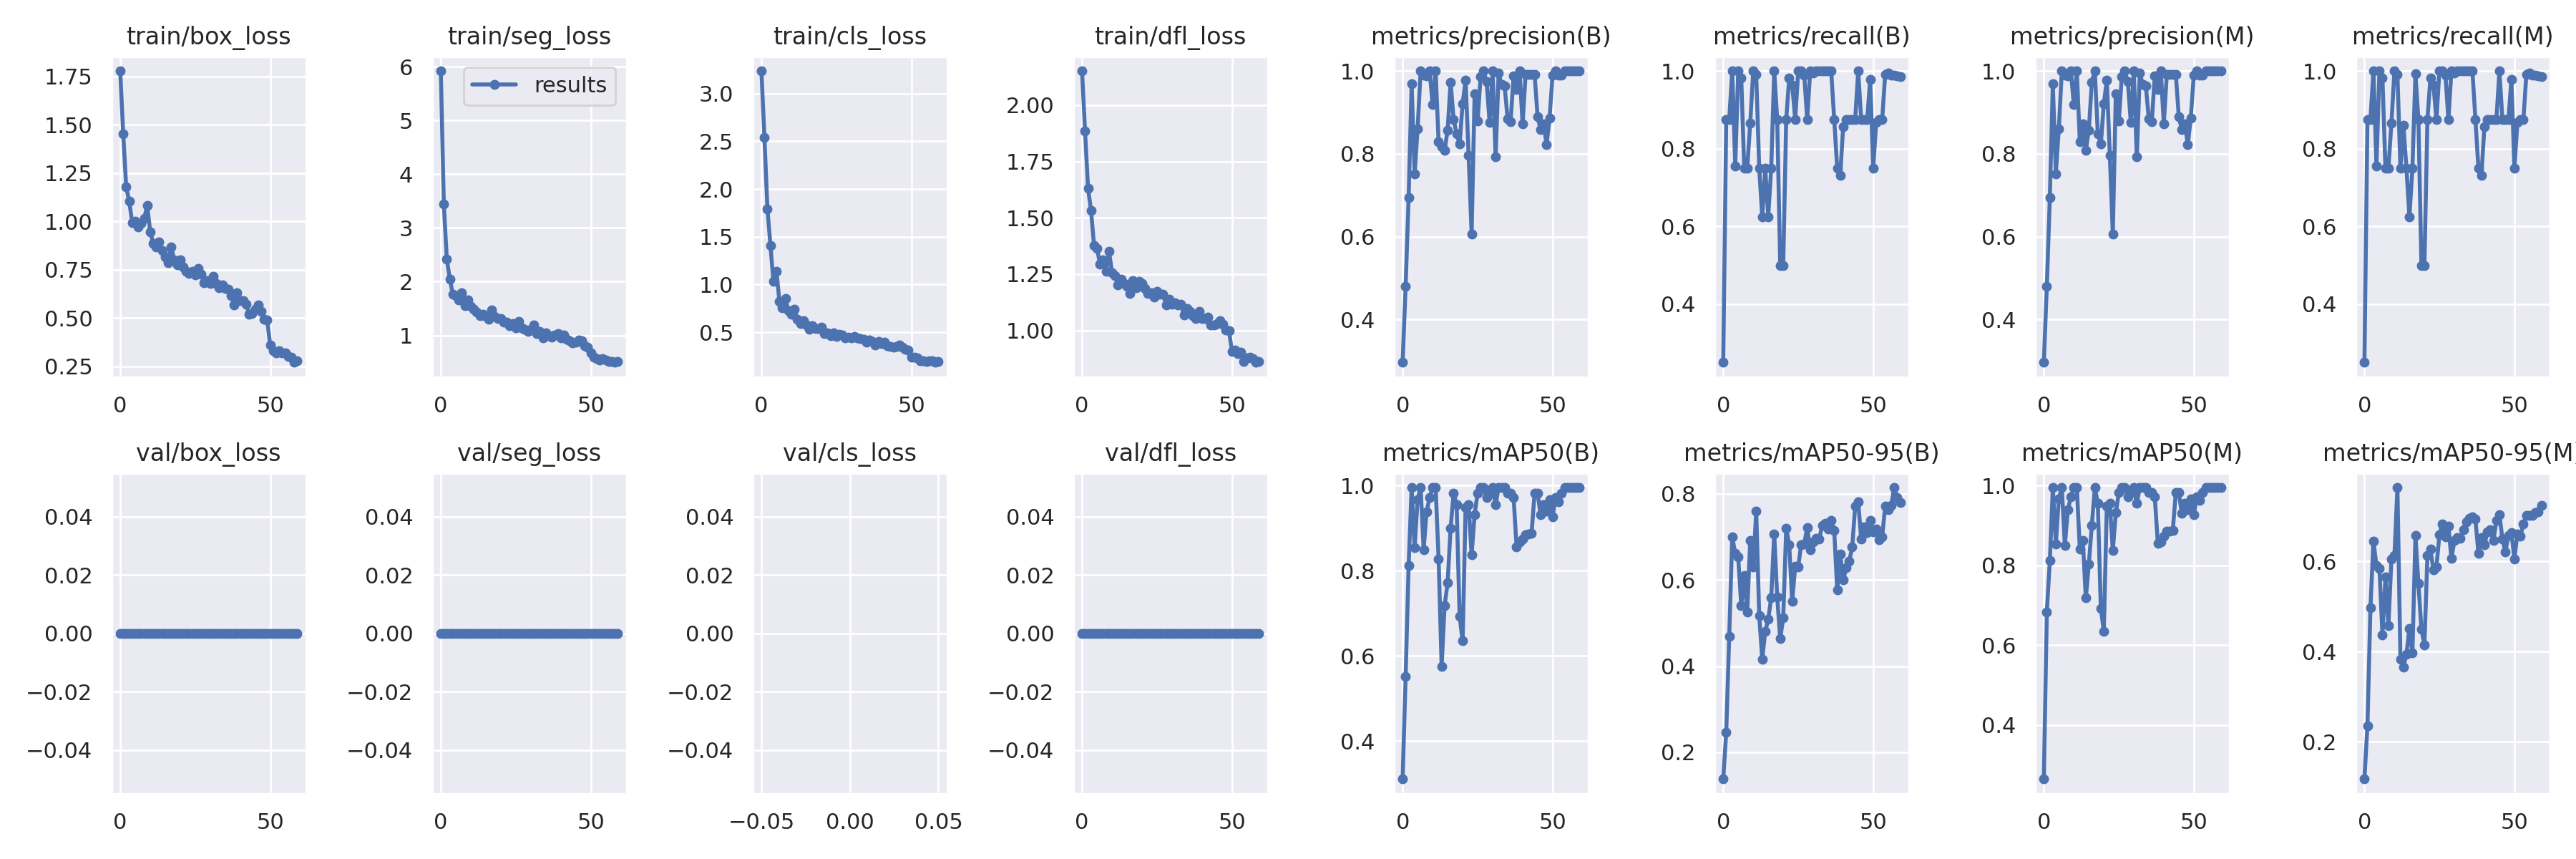

In [23]:
# Here is the graph of the training and validation loss
#box loss and class loss is important
# The behavior of the model is convincing the model is coverging, Training more will give better results
%cd {HOME}

Image(filename=f'{HOME}/runs/segment/train/results.png', width=1200)

/content


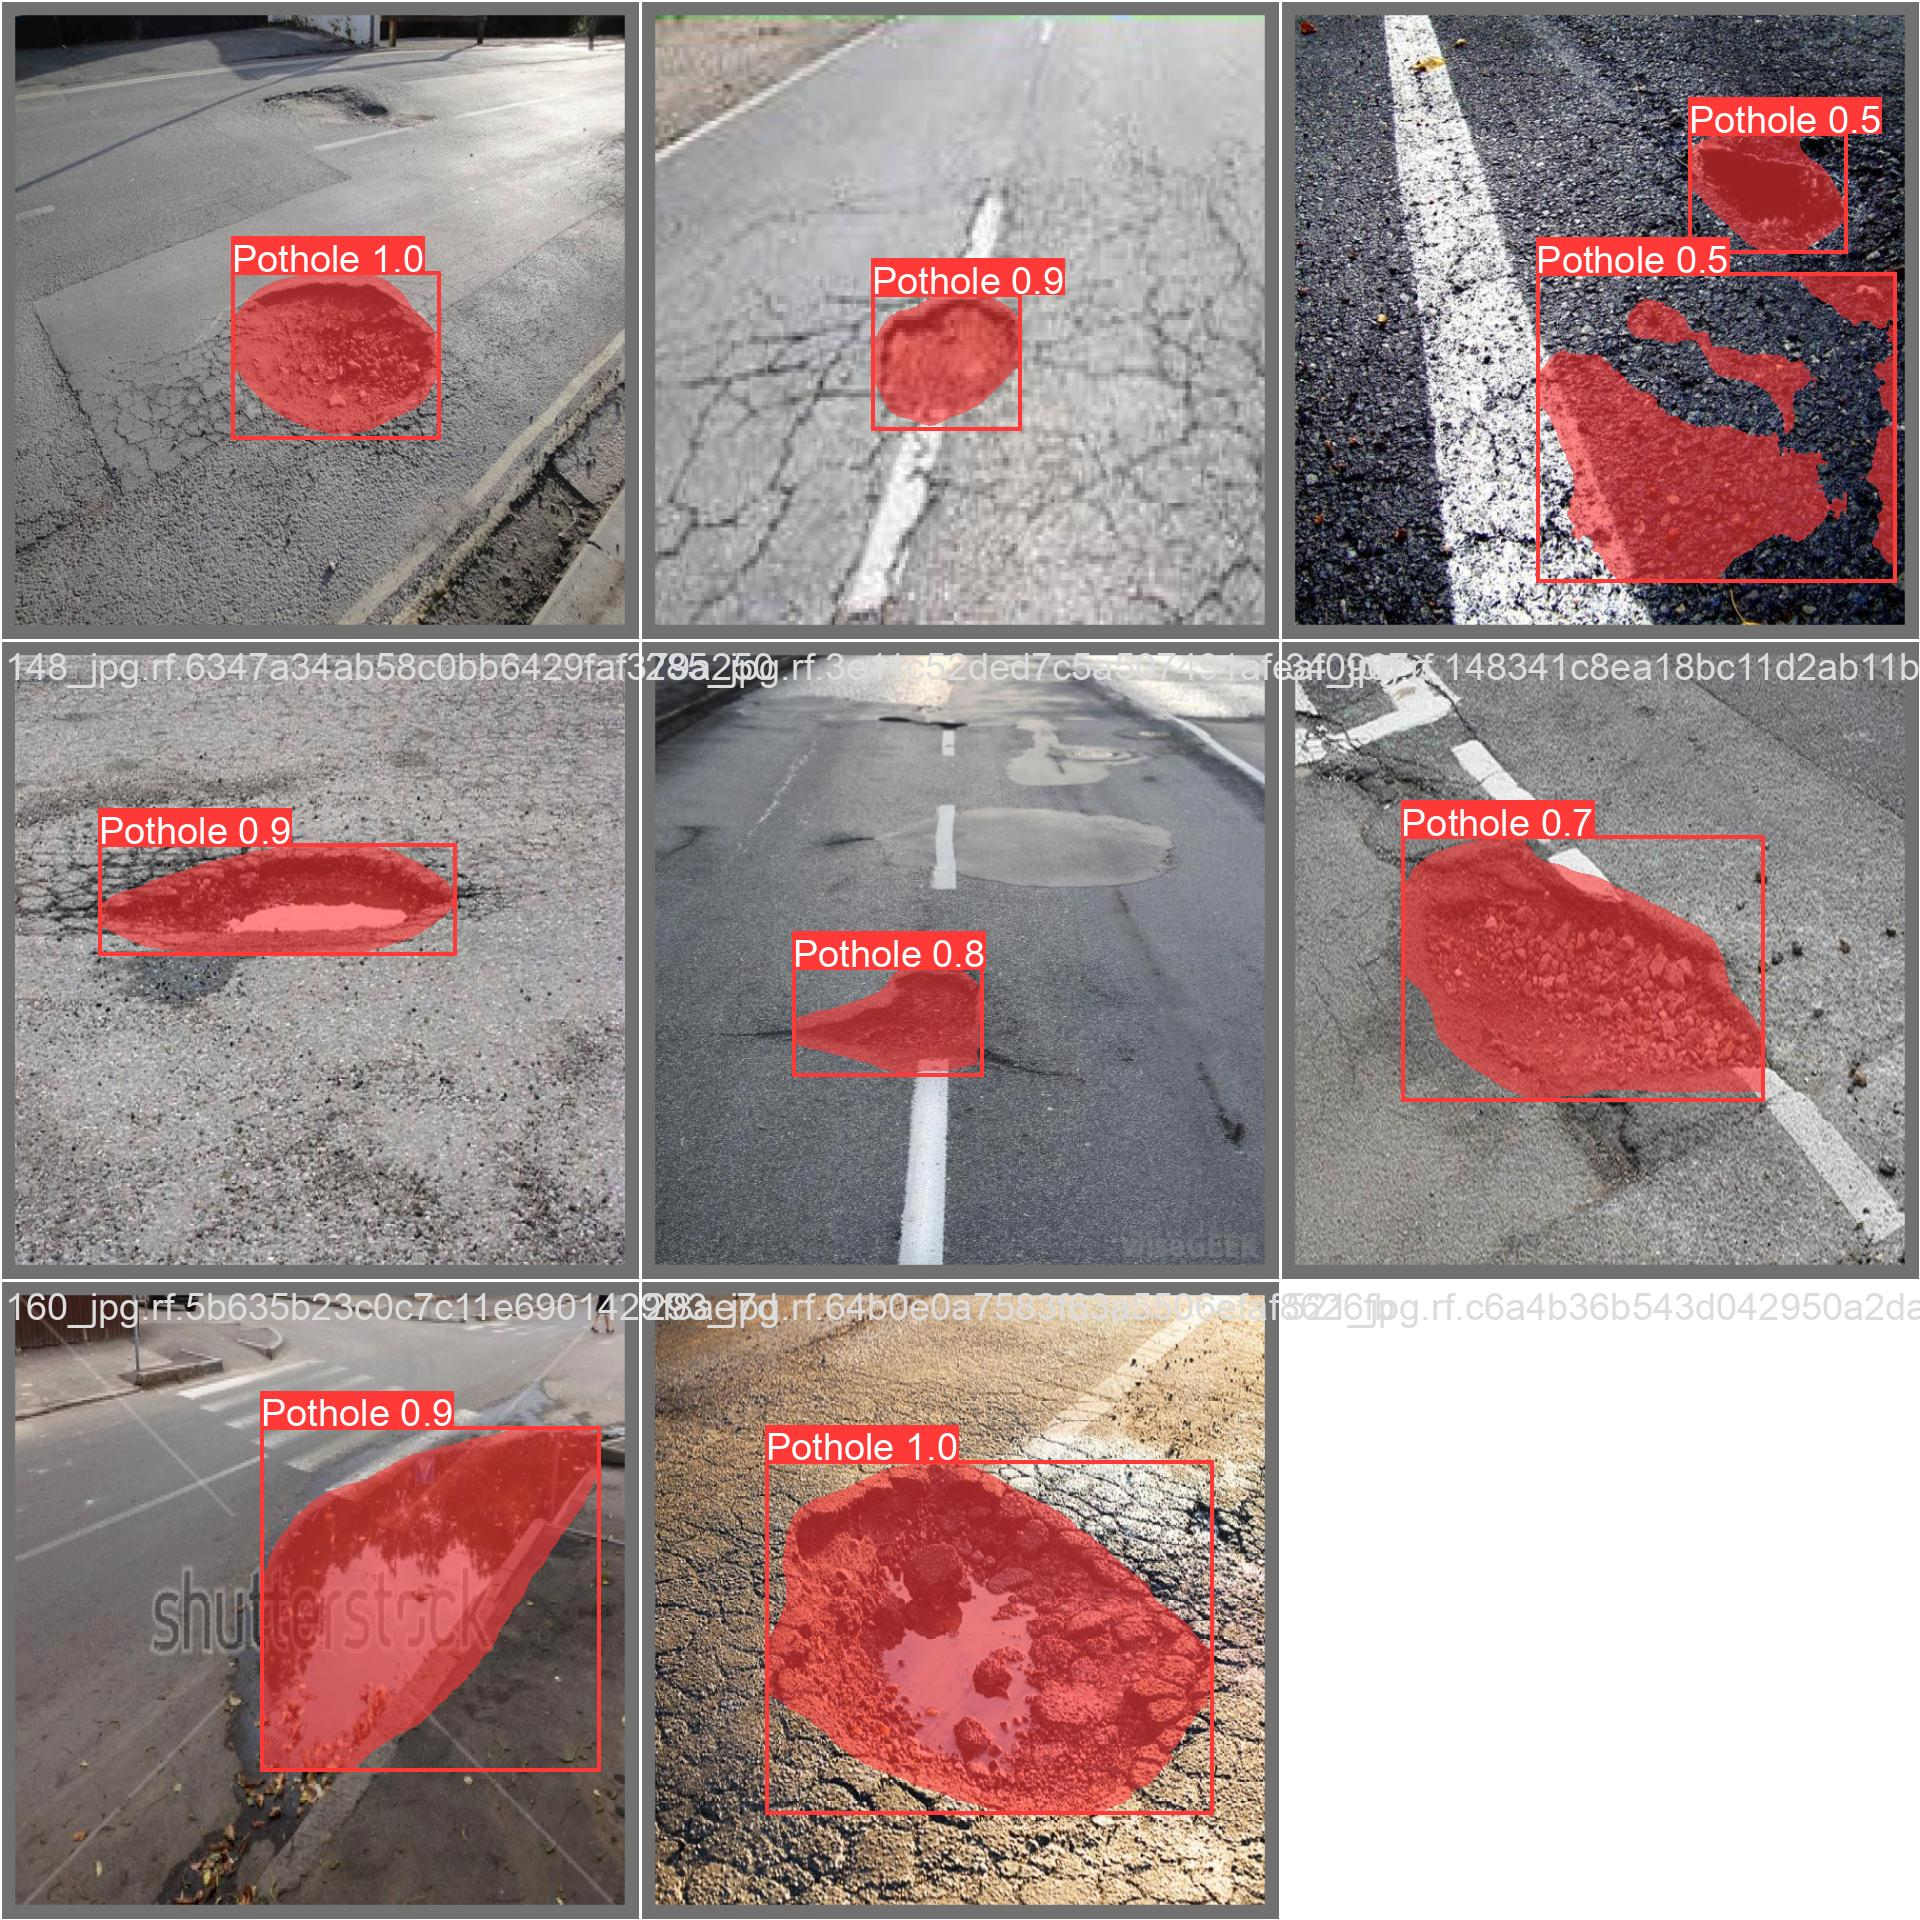

In [24]:
#Model Prediction on validation batch. These image are not used strictly for training so it is always better to take a
#look and see how model is behaving
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=1000)

#**Validate Custom Model**

In [25]:
#Here, we are taking the model best weights and using them to validate the model. Similarly as before we are using
#CLI to do that, The only difference is our mode = val instead of train

%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data=/content/datasets/Pothole_Segmentation-1/data.yaml

/content
2024-01-05 09:22:56.693148: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-05 09:22:56.693197: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-05 09:22:56.694686: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-05 09:22:58.010747: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
YOLOv8l-seg summary: 295 layers, 45912659 parameters, 0 gradients, 220.1 GFLOPs
val: Scanning /content/datasets/Pothole_Segmenta

#**Inference with Custom Model**

In [26]:
!pwd

/content


/content
Downloading...
From: https://drive.google.com/uc?id=18X8hoexLj69v0FccoNsA7QohPJwSh1M9&confirm=t
To: /content/demo.mp4
100% 4.39M/4.39M [00:00<00:00, 13.7MB/s]


In [28]:
#Inference means a prediction that we can run on an image to detect the label,
# whether classification or of a bounding box or a segmentation
# Testing the Model on Test Dataset images
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source='/content/datasets/Pothole_Segmentation-1/test/images'

/content
2024-01-05 09:25:56.825567: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-05 09:25:56.825617: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-05 09:25:56.827054: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-05 09:25:58.531119: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
YOLOv8l-seg summary: 295 layers, 45912659 parameters, 0 gradients, 220.1 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 

In [34]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[5:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

#**Testing on a Demo Video**

In [30]:
# !gdown "https://drive.google.com/uc?id=13aXiMoB7AvcpLkF-4vqsoWIlKHp-CVGw&confirm=t"

# download the demo video
%cd {HOME}
!gdown "https://drive.google.com/uc?id=18X8hoexLj69v0FccoNsA7QohPJwSh1M9&confirm=t"


/content
Downloading...
From: https://drive.google.com/uc?id=18X8hoexLj69v0FccoNsA7QohPJwSh1M9&confirm=t
To: /content/demo.mp4
100% 4.39M/4.39M [00:00<00:00, 133MB/s]


In [33]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source='/content/demo.mp4'

/content
2024-01-05 09:27:56.358830: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-05 09:27:56.358885: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-05 09:27:56.360204: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-05 09:27:57.561907: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
YOLOv8l-seg summary: 295 layers, 45912659 parameters, 0 gradients, 220.1 GFLOPs
video 1/1 (1/324) /content/demo.mp4: 384x640 1 P

#**Display the Demo Video**

In [32]:
!rm "/content/result_compressed.mp4"

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/segment/predict3/demo.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)